In [1]:
import shutil
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import os 
import sys
import matplotlib.pyplot as plt
import pandas as pd
from pyDOE import lhs
%load_ext autoreload
%autoreload 2
import time


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
tfm = tfp.models

In [3]:
inputs = np.loadtxt('./test_Data/X.txt')

In [4]:
outputs = np.loadtxt('./test_Data/Y.txt')

In [5]:
print(inputs.shape)

(100, 4)


In [6]:
labels = ['u1','u2', 'u3','u4']

In [7]:
model = tfm.BGP_model(inputs, outputs, kernel_type = 'RBF', noise_level = 1e-2, labels = labels)

In [8]:
model_info = model.run_mcmc(mcmc_samples = 8000, num_leapfrog_steps = 3, estimate_noise = False, warm_up = True)

Noise variance is fixed.
Excecuting the warmup.
Warmup: 
Warm-Up Iteration:   0 Acceptance Rate: 1.000
Warm-Up Iteration: 500 Acceptance Rate: 0.637
Warm-Up Iteration: 1000 Acceptance Rate: 0.602
Warm-Up Iteration: 1500 Acceptance Rate: 0.592
Warm-Up Iteration: 2000 Acceptance Rate: 0.590
Warm-Up Iteration: 2500 Acceptance Rate: 0.591
Warm-Up Iteration: 3000 Acceptance Rate: 0.589
Warm-Up Iteration: 3500 Acceptance Rate: 0.591
Warm-Up Iteration: 3999 Acceptance Rate: 0.588
Sampling in progress.


W0302 00:27:36.415776 140343208265536 deprecation.py:323] From /root/.local/lib/python3.6/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bayesiangp.py:235: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Acceptance rate of the HMC sampling: 0.583375


In [9]:
print(model_info)

{'samples': {'kernel_variance': array([1.5704051 , 0.50803745, 0.50803745, ..., 1.0321273 , 1.0321273 ,
       1.5219187 ], dtype=float32), 'kernel_inverse_lengthscales': array([[2.010109  , 0.2892863 , 0.24831875, 1.1894934 ],
       [1.7025878 , 0.40873888, 0.4000173 , 1.741502  ],
       [1.7025878 , 0.40873888, 0.4000173 , 1.741502  ],
       ...,
       [0.46246505, 0.4070868 , 0.28189048, 3.3536882 ],
       [0.46246505, 0.4070868 , 0.28189048, 3.3536882 ],
       [0.40687174, 0.16439624, 0.28438005, 3.4832442 ]], dtype=float32), 'gp_constant_mean_function': array([ 0.21371442, -0.3079959 , -0.3079959 , ..., -0.06048197,
       -0.06048197,  0.09403974], dtype=float32)}, 'kernel_type': 'RBF', 'noise_level': 0.01}


In [10]:
model = tfm.BGP_model(inputs, outputs, model_info = model_info, labels = labels)

/root/.local/lib/python3.6/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bgpmodel.py:53: UserWarning: Retrieving model info from previous run. The inputs and outputs arrays must be the same as the previous run.
  warnings.warn("Retrieving model info from previous run. The inputs and outputs arrays must be the same as the previous run.")


In [11]:
model.plot_chains(directory_path  = './')

In [12]:
mean_pos, std_pos, samples = model.predict(inputs, with_point_samples = True)

In [13]:
lower = np.percentile(samples,2.5, axis = 0)
upper = np.percentile(samples,97.5, axis = 0)

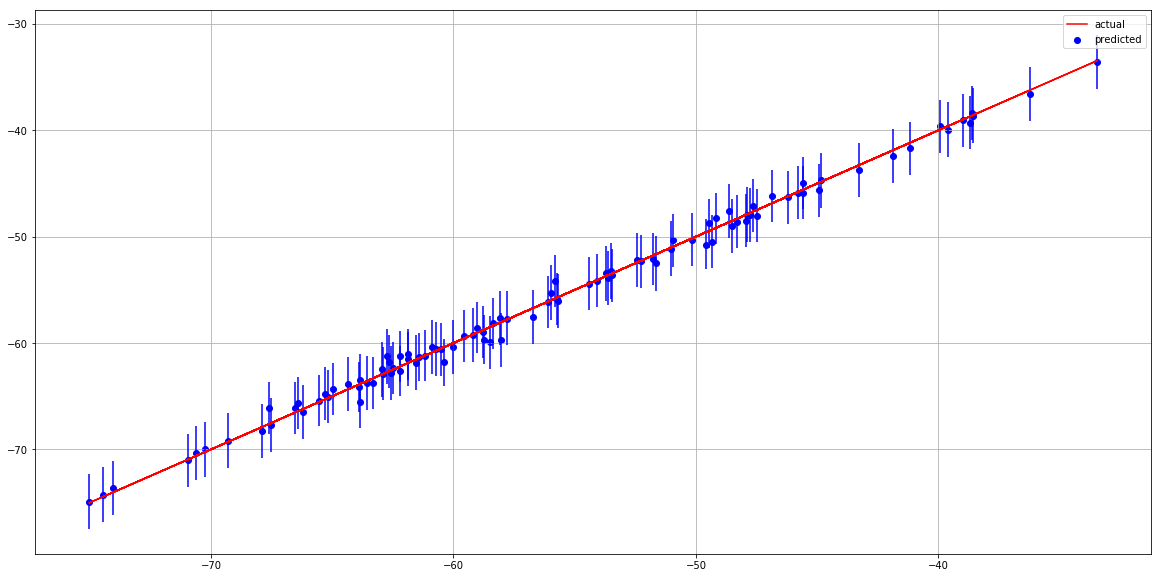

In [14]:
# Predicted vs actual
plt.figure(figsize =(20,10))
plt.plot(outputs, outputs , color = 'red', label ='actual')
plt.scatter(outputs, mean_pos, color = 'blue', label = 'predicted')
plt.vlines(outputs,lower, upper, color = 'blue')
plt.legend()
plt.grid()